# BOSTON MARATHON

# I INTRODUCTION:

Bib: Athlete's number

Name: Athlete's name

Age: Athlete's age

M/F:Male or Female

City: Athele's city

State: Athele's state

Country: Athele's country

Citizen: Athele's nationality

5K: Running time 5km

10km: Running time 10km

15km: Running time 15km

20km: Running time 20km

Half: Running time Half

25km: Running time 25km

30km: Running time 30km

35km: Running time 35km

40km: Running time 40km

Pace: Running time in 1 minute

Proj Time: 

Official Time: Official runtime

Overall: Ranking on total number of athele

Gender: Ranking by gender

Division: Ranking by age

# II CONTENT:

## 1. Import packets and dataset

In [134]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from datetime import datetime

In [135]:
original  = pd.read_csv('marathon_results_2016.csv')

In [136]:
original.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


In [137]:
original.shape

(26630, 24)

 # 2. Handle missing value

In [138]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26630 entries, 0 to 26629
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bib            26630 non-null  object
 1   Name           26630 non-null  object
 2   Age            26630 non-null  int64 
 3   M/F            26630 non-null  object
 4   City           26629 non-null  object
 5   State          23783 non-null  object
 6   Country        26630 non-null  object
 7   Citizen        1122 non-null   object
 8   Unnamed: 8     83 non-null     object
 9   5K             26630 non-null  object
 10  10K            26630 non-null  object
 11  15K            26630 non-null  object
 12  20K            26630 non-null  object
 13  Half           26630 non-null  object
 14  25K            26630 non-null  object
 15  30K            26630 non-null  object
 16  35K            26630 non-null  object
 17  40K            26630 non-null  object
 18  Pace           26630 non-n

int64: 4 features

object: 20 features

In [151]:
#Drop feature Rank_Tot and Country_code
df1 = original.drop(columns = {'Bib', 'Unnamed: 8','City', 'State', 'Citizen', '5K', '10K', '15K', '20K', 'Half', '25K', 
                               '30K','35K', '40K', 'Proj Time'})
df1 = df1.dropna()

## 3 Univariate analysis

### 3.1 Object variable

In [115]:
df1.describe(include = "O")

,Name,M/F,Country,Pace,Official Time
count,26630,26630,26630,26630,26630
unique,26559,2,79,546,8901
top,"Hoffman, Jennifer",M,USA,0:08:23,3:27:48
freq,3,14463,21649,158,15


#### Gender

In [116]:
gender = df1['M/F'].value_counts()

<AxesSubplot:title={'center':'Participation rate by gender'}, ylabel='M/F'>

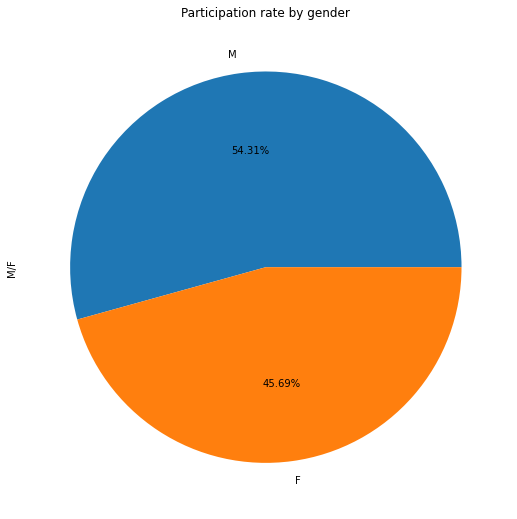

In [128]:
f,ax=plt.subplots(1,1,figsize=(15,9))
ax.set_ylabel('')
ax.set_title('Participation rate by gender')
df1['M/F'].value_counts().plot.pie(autopct='%1.2f%%', shadow=False)

In [118]:
gender

M    14463
F    12167
Name: M/F, dtype: int64

In [119]:
print(" Total number of athletes participating: ", gender.values[0] + gender.values[1])

 Total number of athletes participating:  26630


Athlete's female rate is less than athlete's male rate 

#### Country

In [122]:
df1['Country'].value_counts()

USA    21649
CAN     2134
GBR      366
MEX      252
JPN      185
       ...  
PAK        1
UGA        1
VGB        1
FLK        1
MAR        1
Name: Country, Length: 79, dtype: int64

In [121]:
males = df1[df1['M/F'] == 'M']
females = df1[df1['M/F'] == 'F']

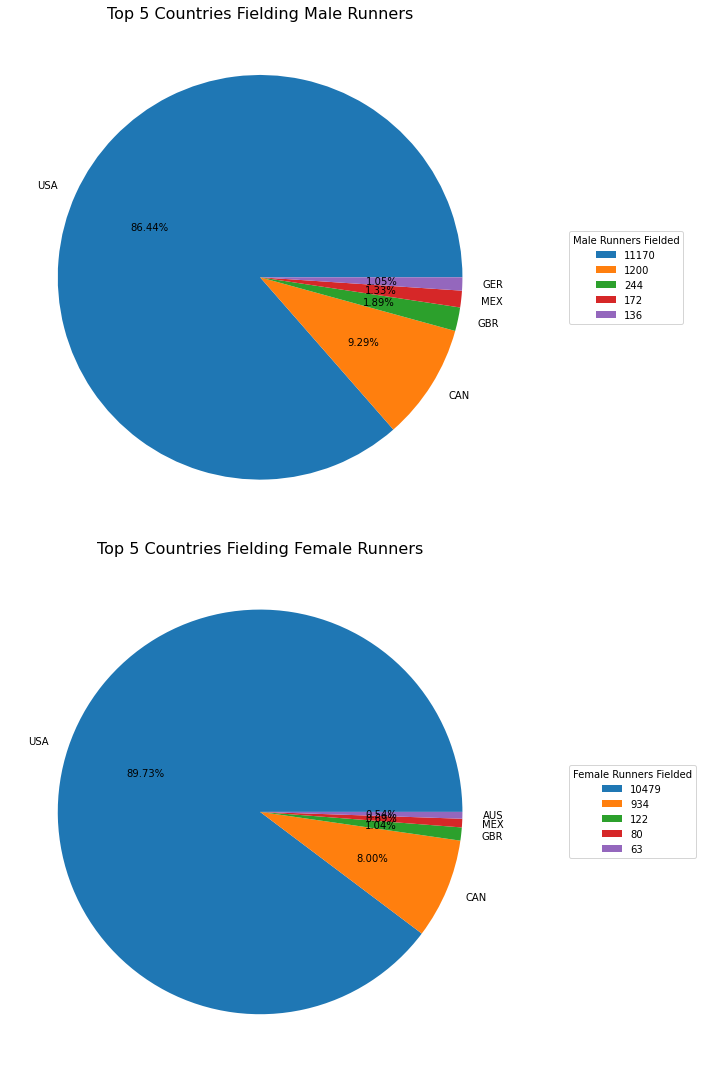

In [126]:
female_field = females['Country'].value_counts().head(5)
male_field = males['Country'].value_counts().head(5)


fig, ax = plt.subplots(2,1, figsize = (30,15))

#Plotting Male Field
ax[0].pie(male_field, labels = male_field.index, autopct='%1.2f%%')
ax[0].legend(male_field,
            title = 'Male Runners Fielded',
            loc = 'center left',
            bbox_to_anchor=(1.1, 0, 0.5, 1))
ax[0].set_title('Top 5 Countries Fielding Male Runners', fontsize = 16)

#Plotting Female field
ax[1].pie(female_field, labels = female_field.index, autopct='%1.2f%%')
ax[1].legend(female_field,
            title = 'Female Runners Fielded',
            loc = 'center left',
            bbox_to_anchor=(1.1, 0, 0.5, 1))
ax[1].set_title('Top 5 Countries Fielding Female Runners', fontsize = 16)


plt.tight_layout()
plt.show()

America has the hightest ratio of male and female athletes in the world

#### Pace

In [169]:
def time_to_sec(string):
    if string :
        time_segments = string.split(':')
        hours = int(time_segments[1])
        mins = int(time_segments[1])
        sec = int(time_segments[2])
        time = hours*60 + mins + sec
        return time
    else:
        return (-1)

In [170]:
df1['Pace_sec'] = df1['Pace'].apply(lambda x: time_to_sec(x))

<AxesSubplot:xlabel='Pace_sec', ylabel='Count'>

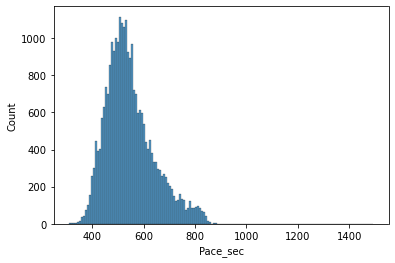

In [168]:
sns.histplot(data = df1['Pace_sec'])

In [16]:
df1.describe()

,Age,Result_sec,Rank_Gender
count,26651.000000,26651.000000,26651.000000
mean,42.799895,13980.057184,6731.454242
std,11.537523,2697.850346,3962.252174
min,18.000000,7677.000000,1.000000
25%,34.000000,12025.500000,3332.000000
50%,43.000000,13534.000000,6664.000000
75%,51.000000,15538.500000,9995.000000
max,83.000000,25197.000000,14671.000000
